In [49]:
import cdsapi
c = cdsapi.Client()

from netCDF4 import Dataset,num2date
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfea
import cartopy.util as cutil
import matplotlib as mplt
import numpy as np
from mpl_toolkits.axes_grid1 import make_axes_locatable
from cdo import Cdo
cdo=Cdo()
scr="/Users/tompkins/Downloads/"

In [54]:
def plot_map(ifile,title="",varname="",units='mm day$^{-1}$',levels=[0,0.1,1,2,5,10,20,30,50]):

    projection=ccrs.PlateCarree()
    bbox=[-180,180,-90,90];creg='glob'
    mplt.rc('xtick', labelsize=9) 
    mplt.rc('ytick', labelsize=9)

    # read the netcdf data
    nc = Dataset(ifile,'r')
    lat = nc.variables['latitude'][:]
    lon = nc.variables['longitude'][:]
    pr= (nc.variables[varname][0,:,:])
    nc.close()

    #
    lon2d, lat2d = np.meshgrid(lon, lat)
    cdata, clon2d, clat2d = cutil.add_cyclic(pr,lon2d,lat2d)


    # set up the figure size
    fig=plt.figure(figsize=(11,5))
    ax=fig.add_subplot(1,1,1,projection=projection)
    ax.set_extent(bbox,projection)

    # add map features
    ax.add_feature(cfea.COASTLINE,lw=.5)
    #ax.add_feature(cfea.RIVERS,lw=.5)
    ax.add_feature(cfea.BORDERS, linewidth=0.6, edgecolor='dimgray')

    # add gridlines
    gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                      linewidth=1.0, color='gray', alpha=0.7, linestyle='--')
    gl.top_labels = False
    gl.left_labels = True
    gl.right_labels = True
    gl.xlabel_style = {'size': 8, 'color': 'black'}
    gl.ylabel_style = {'size': 8, 'color': 'black'}

    # specify levels and colormap
    #levels=[0,0.1,0.2,0.5,1,2,5,10,20,30,50]
    cmap=plt.cm.BrBG
    norm=mplt.colors.BoundaryNorm(levels,cmap.N)

    # make plot
    pc=ax.contour(clon2d,clat2d,cdata,levels=levels,transform=projection)
    pc=ax.contourf(clon2d,clat2d,cdata,levels=levels,transform=projection,cmap=cmap,norm=norm,extend='max')

    divider = make_axes_locatable(ax)
    ax_cb = divider.new_horizontal(size="3%", pad=0.5, axes_class=plt.Axes)
    cbar=fig.colorbar(pc,extend='both', cax=ax_cb)
    fig.add_axes(ax_cb)

    # add colorbar
    fig.colorbar(pc,extend='both',cax=ax_cb)
    cbar.ax.get_yaxis().labelpad = 15
    cbar.ax.set_ylabel(units, rotation=270)
    cbar.ax.set_title('')

    # add title
    ttitle=title
    ax.set_title(ttitle,loc='left',fontsize=12)

In [45]:
ifile=scr+"precip.nc"
varlist=['sea_surface_temperature', 'surface_latent_heat_flux', 'surface_net_solar_radiation',
            'surface_net_thermal_radiation', 'surface_sensible_heat_flux', 'top_net_solar_radiation',
            'top_net_thermal_radiation', 'total_column_water_vapour', 'total_precipitation']

c.retrieve(
    'reanalysis-era5-single-levels-monthly-means',
    {
        'format': 'netcdf',
        'year': '2020',
        'month': [
            '01', '02', '03',
            '04', '05', '06',
            '07', '08', '09',
            '10', '11', '12',
        ],
        'product_type': 'monthly_averaged_reanalysis',
        'variable': varlist,
        'grid':[1.0,1.0],
        'time': '00:00',
    },
    ifile)




2023-11-13 13:08:53,300 INFO Welcome to the CDS
2023-11-13 13:08:53,301 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels-monthly-means
2023-11-13 13:08:53,457 INFO Request is queued
2023-11-13 13:09:26,320 INFO Request is running
2023-11-13 13:09:43,435 INFO Request is completed
2023-11-13 13:09:43,436 INFO Downloading https://download-0005-clone.copernicus-climate.eu/cache-compute-0005/cache/data7/adaptor.mars.internal-1699877374.0481625-4398-2-a24cf865-2f12-49aa-ad0f-e2ac9947633f.nc to /Users/tompkins/Downloads/precip.nc (13.4M)
2023-11-13 13:09:49,542 INFO Download rate 2.2M/s                                                    


Result(content_length=14080360,content_type=application/x-netcdf,location=https://download-0005-clone.copernicus-climate.eu/cache-compute-0005/cache/data7/adaptor.mars.internal-1699877374.0481625-4398-2-a24cf865-2f12-49aa-ad0f-e2ac9947633f.nc)

In [50]:

cdo.timmean(input="-aexpr,pr=1000*tp "+ifile,output=scr+"yearmean.nc",options="-b f32")
cdo.timmean(input="-selmon,12,1,2 -aexpr,pr=1000*tp "+ifile,output=scr+"DJFmean.nc",options="-b f32")
cdo.timmean(input="-selmon,6,7,8 -aexpr,pr=1000*tp "+ifile,output=scr+"JJAmean.nc",options="-b f32")



'/Users/tompkins/Downloads/JJAmean.nc'

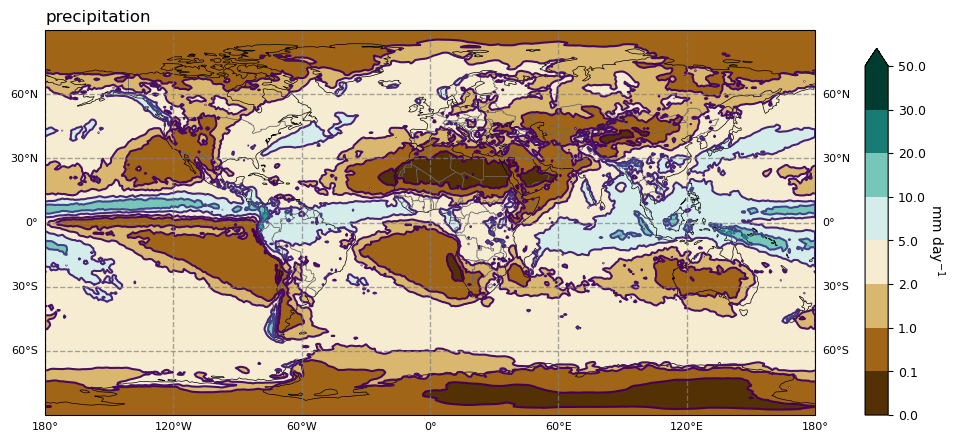

In [56]:
plot_map(scr+"yearmean.nc",title="precipitation",varname="pr",units='mm day$^{-1}$')
plt.show()

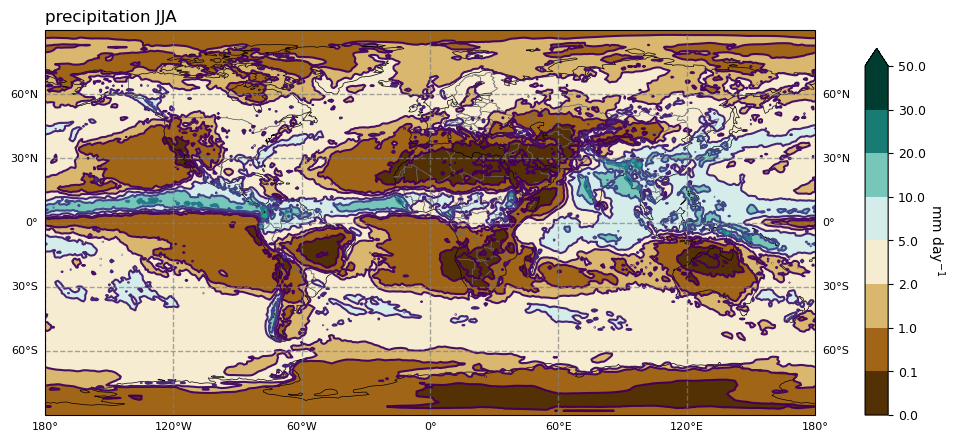

In [55]:
plot_map(scr+"JJAmean.nc",title="precipitation JJA",varname="pr",units='mm day$^{-1}$')
plt.show()

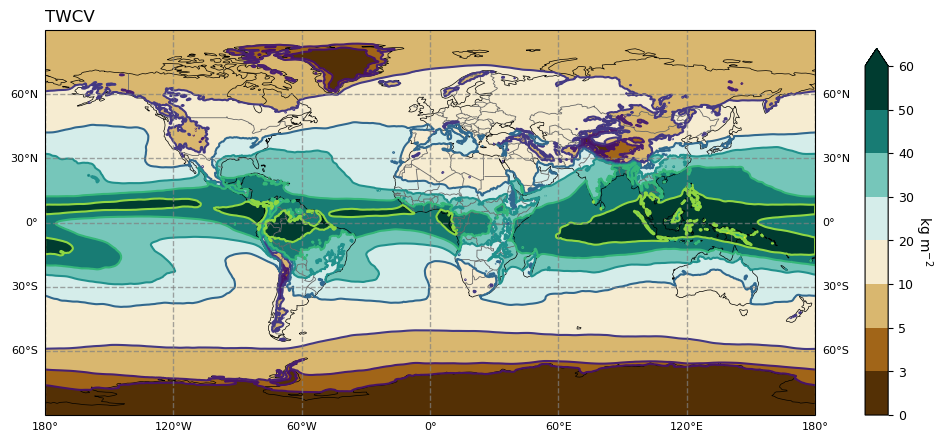

In [52]:
plot_map(ofile,title="TWCV",varname="tcwv",levels=[0,3,5,10,20,30,40,50,60],units='kg m$^{-2}$')
plt.show()